# Intro to Automatic Differentiation

## *Why do we need it? How does it compare to numerical or symbolic approaches?*

### Worksheet

You can work on this worksheet during the lecture. Feel free to augment it and use it for your own notes.

In [ ]:
# We will need these libraries for many of the tasks discussed below.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy

In [ ]:
# And these functions would help us skip some of the boring work of generating and visualizing mock training data.
def get_mock_training_set(input_dims=3, output_dims=2, samples=1000):
    if input_dims<output_dims:
        raise NotImplementedError('We only do `input_dims >= output_dims` for this mock data.')
    x = np.random.rand(input_dims, samples)*2-1
    noise = np.random.normal(size=(input_dims, samples))*0.05
    y = np.zeros((output_dims, samples))
    for i in range(output_dims):
        y[i,:] = (x[i,:]>0.0)*2-1
    x += noise
    return x,y

def plot_training_set(x, y):
    plt.close('all')
    if x.shape[0]<=2:
        f, axes = plt.subplots(ncols=y.shape[0], figsize=(3*y.shape[0],3))
    elif x.shape[0]>=3:
        f, axes = plt.subplots(ncols=y.shape[0], figsize=(4.7*y.shape[0],4.7), subplot_kw={'projection':'3d'})        
    if y.shape[0] == 1:
        axes = [axes]
    for i,a in enumerate(axes):
        if x.shape[0] == 1:
            print('Too few input dimensions to make an interesting plot...')
        elif x.shape[0] == 2:
            a.scatter(x[0,:],x[1,:],c=y[i,:],vmin=0,vmax=1,alpha=0.5,cmap='coolwarm')
            a.set_aspect('equal')
            a.set_ylim(-1.09,1.09)
            a.set_ylabel('Input dimenion (feature) 2')
        elif x.shape[0] >= 3:
            a.scatter(x[0,:],x[1,:],x[2,:],c=y[i,:],vmin=0,vmax=1,alpha=1.,cmap='coolwarm')
            a.set_aspect('equal')
            a.set_ylim(-1.09,1.09)
            a.set_zlim(-1.09,1.09)
            a.set_ylabel('Input dimenion (feature) 2')
            a.set_zlabel('Input dimenion (feature) 3')
            if x.shape[0] > 3:
                print("Not all input dimensions are shown!")
        a.set_title('Output dimension (label) %d'%(i+1))
        a.set_xlim(-1.09,1.09)
        a.set_xlabel('Input dimenion (feature) 1')
    f.tight_layout()
    return f, axes

# A very simple classification problem

Let us start from the beginning. We will try to create a small classifier and then optimize its parameters until it performs well.

Here we generate some mock training data for a classification problem.

The input is $n=2$ dimensional and the output is $m=2$ dimensional (i.e. there are two labels)

In [ ]:
x, y_true = get_mock_training_set(input_dims=2, output_dims=2, samples=1000)
plot_training_set(x, y_true);

Let's us try to make a very simple model...

# $\overrightarrow{\mathrm{labels}} = \mathrm{sigmoid}\left(\mathrm{W}.\overrightarrow{\mathrm{features}}\right)$

In [ ]:
def model(parameters, v_in):
    linear_mix = # FILL IN with an expression for a linear fully connected NN layer (`parameters` is the weight matrix)
    activation = # FILL IN by applying a `tanh` activation function to the linear layer
    return activation

def cost(parameters, v_in_train, v_out_train):
    return # FILL IN with a resonable cost function descriptive of the performance of the model

This model requires us to find the appropriate values for the `parameters` matrix. What happens if we just guess...

In [ ]:
def random_parameters(input_dims, output_dims):
    return np.random.normal(size=(output_dims,input_dims))*0.1

p = random_parameters(2, 2)
y_predicted = model(p, x)

def threshold(y_predicted): # This function turns the pseudo-probability provided by the model into values for the labels.
    return (y_predicted > 0)*2 - 1

plot_training_set(x, threshold(y_predicted)); # Naturally, the randomly initialized model does not perform well.

# How can we find better values for the parameters?

Find the direction in which the cost decreases and follow it.

### $\mathrm{\nabla} C(\vec{p}) = \left[
\frac{\partial{C}}{\partial{p_1}}\ 
\frac{\partial{C}}{\partial{p_2}}\ 
\cdots
\right]$

### $\vec{p}_{\text{better}} = \vec{p}_\text{current} - \gamma\ \mathrm{\nabla} C(\vec{p}_\text{current})$

where $\gamma$ is "not too big".

### $\vec{p}_{\text{better}} = \vec{p}_\text{current} - \gamma\ \mathrm{\nabla} C(\vec{p}_\text{current}) $

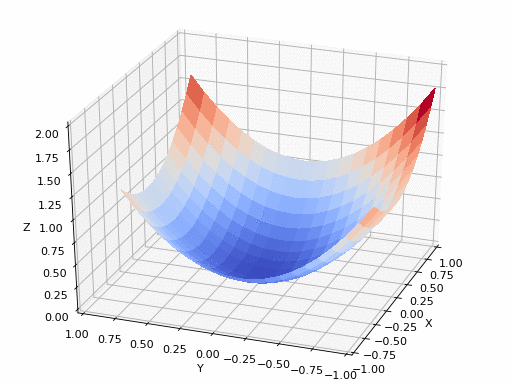

# Many ways to get the gradient...

## *We will discuss the pros and cons of various approaches.*

## *We will implement simple examples of each.*

## *And we will see why "backpropagation" is so frequently used in ML.*

# First Method: Getting the gradient numerically

### $\frac{\partial{C}}{\partial{p_1}} \approx \frac{C(p_1+h,\ p_2,\ \dots)-C(p_1,\ p_2,\ \dots)}{h}$

where $h$ is "rather small".

In [ ]:
def numerical_gradient(parameters, function):
    # We will implement it only for the scalar `function` of multiple `parameters` (an array).
    
    grad_f = # FILL IN with an empty array the same shape as `parameters
             # which we will populate with all components of the gradient.
             # I.e. `grad_f[i]` = derivative of `function` wrt `parameters[i]`
    for # each element of `parameters`
        h = # the small change in that parameter
        grad_f[] = # f(p+h)-f(p) / h
    return grad_f

Did it work?

In [ ]:
def f(parameters): # This is the function describing the performance of our model.
    return cost(parameters, x, y_true)
f(p)

Is it indeed better after one iteration?

### $\vec{p}_{\text{better}} = \vec{p}_\text{current} - \gamma\ \mathrm{\nabla} C(\vec{p}_\text{current}) $


In [ ]:
f(p - 0.0001*numerical_gradient(p, f))

# Testing the gradient descent

### $\vec{p}_{\text{better}} = \vec{p}_\text{current} - \gamma\ \mathrm{\nabla} C(\vec{p}_\text{current}) $

In [ ]:
def gradient_descent(parameters, function, gradient_calculator, steps):
    '''This function minimizes `function(parameters)`, by performning gradient descent.
    
    It performs `steps` iterations of the gradient descent.
    It uses the higher-order function `gradient_calculator` to calculate the gradient.
    It also plots all the steps of the gradient descent.'''
    log = [function(parameters)]
    for s in range(steps):
        parameters = parameters - 0.0001 * gradient_calculator(parameters, function)
        log.append(function(parameters))
    plt.plot(log)
    plt.xlabel('step')
    plt.ylabel('function value')
    return parameters

In [ ]:
new_p = gradient_descent(p, f, numerical_gradient, 100) # Is it actually minimizing `f`?

In [ ]:
y_predicted = model(p, x) # the initial randomly guessed parameters
plot_training_set(x, threshold(y_predicted));

In [ ]:
y_predicted = model(new_p, x) # the optimized parameters
plot_training_set(x, threshold(y_predicted));

# Problems?

# Numerical Problem 1: Numerical errors

In [ ]:
f = lambda p: p**2 + np.sqrt(p+3)
exact_grad_f = lambda p: 2*p + 0.5 / np.sqrt(p+3)

def error_estimate(f, exact_grad_f, p0, h):
    numeric = (f(p0+h) - f(p0)) / h
    return np.abs(exact_grad_f(p0) - numeric)

hs = np.logspace(-15, 0, num=100)
errors = [error_estimate(f, exact_grad_f, 3.5, h) for h in hs]
plt.loglog(hs,errors)
plt.xlabel('h'); plt.ylabel('error');

# Numerical Problem 2: Each parameter requires recalculating $f$

Pictorial representation of a 3-dimensional function of 5 parameters.

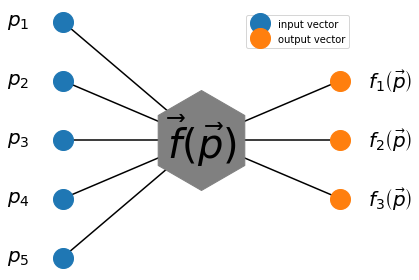

# Numerical Problem 2: Each Parameter Requires recalculating $f$

We need to perturb every single parameter and recalculate $f$.

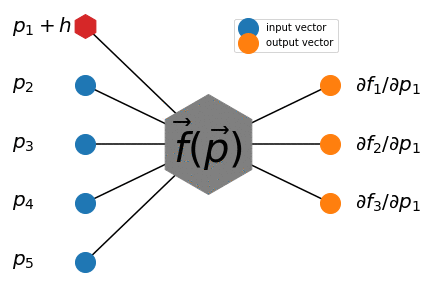

# Numerical Problem 2: Each Parameter Requires recalculating $f$

And ML models frequently have millions of parameters...

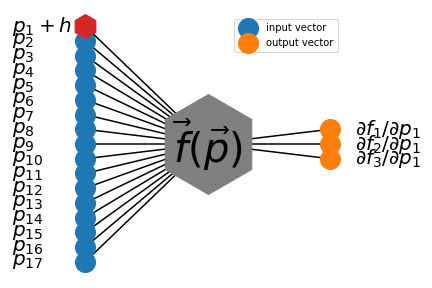

# Second Method: We can do it symbolically!

In [ ]:
x = sympy.Symbol('x') # Sympy is a computer algebra system that can help us work with symbolic expressions.

# This routine applies the same function repeatedly to build a multi-layer symbolic expression.
def repeated_layers(n):
    current_layer = x
    for i in range(n):
        current_layer = 4*current_layer*(1-current_layer)
    return current_layer

In [ ]:
# Let's see what a couple of layers of it look like?
repeated_layers(# 1 or 2 or 5 )

In [ ]:
# And the symbolic derivative of that big expression is?
repeated_layers(5).diff()

In [ ]:
# Sympy has a `count_ops` function that will tell us how big the expression is (how many operations it contains).
ops = [sympy.count_ops(repeated_layers(n).diff()) for n in range(10)]
plt.plot(ops)
plt.xlabel('number of layers')
plt.ylabel('complexity of the derivative');

#### Numerical differentiation is simple but slow and noisy.

#### Symbolic differentiation requires dealing with gigantic expressions (and writing completely new code).

#### Automatic differentiation: apply the symbolic rule at each step, but compute and save its value immediately!

# Third Method: Forward Mode Automatic Differentiation

Use the chain rule at each step in order to keep track of the intermediate gradients.

## $\frac{\partial f\left(g(x)\right)}{\partial x} = f^\prime\left(g(x)\right)\times g^\prime(x)$

In [ ]:
expression = [np.exp, np.tanh] # This would be our way to ask "calculate the expression exp(tanh(x))".
# e.g. [np.sin, np.cos] corresponds to `sin(cos(x))

def forward_automatic_differentiation(expression,input_value):
    current_value = input_value
    current_derivative = 1
    for function in expression[::-1]: # Why are we using [::-1]?
        # FILL IN with the calculation for the intermediate value up to the current stage of the expression
        # FILL IN with the calculation for the gradient of the current intermediate value
        # You can use a dictionary of derivatives, like the one in the next cell.
    return current_value, current_derivative # We want to return both the computed value
                                             # and the derivative of the computed value.

In [ ]:
derivatives = {
    np.exp   :  np.exp,
    np.tanh  :  lambda x: 1 - np.tanh(x)**2,
    np.sin   :  np.cos,
    np.cos   :  lambda x: -np.sin(x)
} # quite an incomplete list

In [ ]:
# Test it at calculating exp(tanh(0.5)) and its derivative at that point.
forward_automatic_differentiation([np.exp, np.tanh], 0.5)

In [ ]:
np.exp(np.tanh(0.5)) # Double check whether we were correct!

In [ ]:
h = 0.0001
(np.exp(np.tanh(0.5+h)) - np.exp(np.tanh(0.5))) / h # Double check numerically the derivative as well!

# How expensive is this?

We do need to run it multiple times for each dimension, as was the case for numerical differentiation.

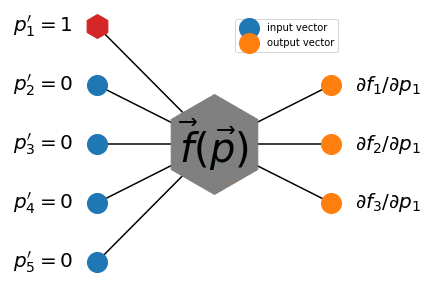

# Forth Method: Backpropagation (a.k.a. Reverse Mode AD)

Calculate the forward pass without calculating derivatives, but while saving the intermediate results.

Go backwards, and calculate the "sensitivity" (a.k.a. the adjoint) of the final expression in terms of its intermediate values.

$y = f(g(h(x)))$

- sensitivity of $y$ w.r.t. itself is $\frac{\partial y}{\partial y} = 1$
- sensitivity of $y$ w.r.t. to the intermediate variable $v_1=g(h(x))$ is $\frac{\partial y}{\partial v_1} = f^\prime (v_1)$
- sensitivity of $y$ w.r.t. to the intermediate variable $v_2=h(x)$ is
$\frac{\partial y}{\partial v_2} =
\frac{\partial y}{\partial v_1}\frac{\partial v_1}{\partial v_2} =
f^\prime (v_1) g^\prime (v_2)$
- etc. until we are all the way back to the sensitivity of $y$ w.r.t. $x$

Pictorially:
    
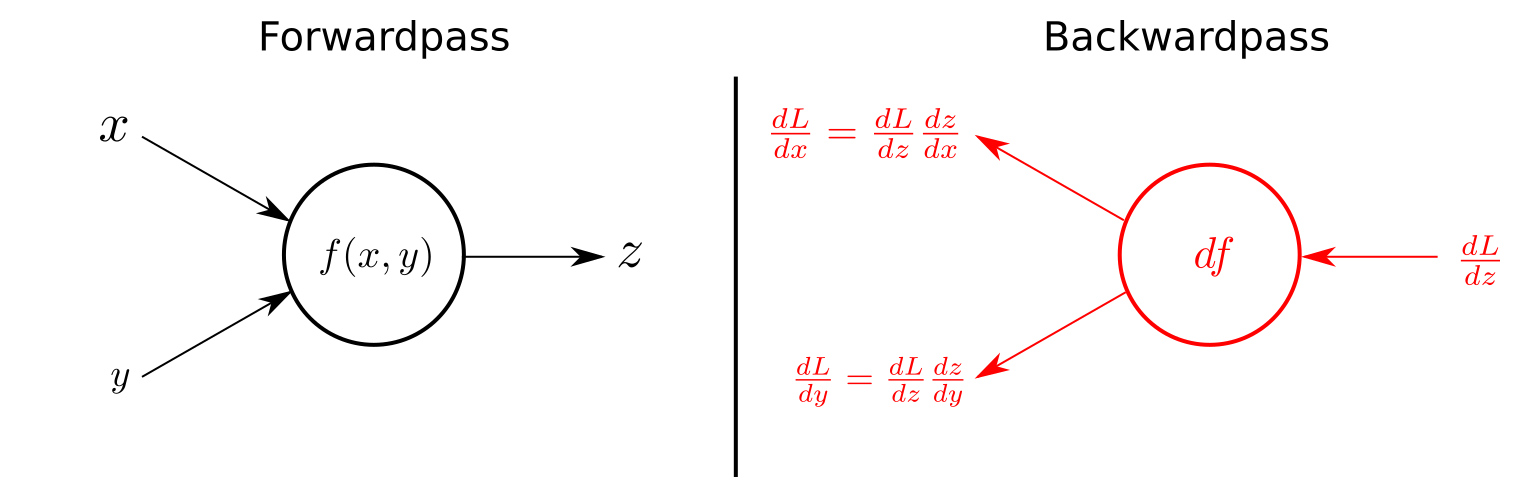

Image credit: Frederik Kratzert

# Let's implement it ourselves!

In [ ]:
def reverse_automatic_differentiation(expression,input_value):
    current_value = input_value
    intermediate_values = [] # We will keep all intermediate values stored here.
    for function in expression[::-1]:
        # FILL IN: Calculate and save all intermediate values.
    current_adjoint = 1
    for function, value in zip(expression, intermediate_values[::-1]):
        # FILL IN: Go backwars through the intermediate values
        # and corresponding steps of the expression,
        # in order to evaluate the "sensitivity" d y / d intermediate value.
    return current_value, current_adjoint

In [ ]:
reverse_automatic_differentiation([np.exp, np.tanh], 0.5) # And let's test it the same way we tested the forward mode

# How expensive is this?

We do need to run it multiple times for each output dimension! Good thing that cost functions in ML are scalar.

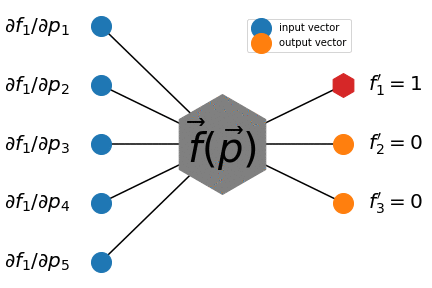

# Takeaways

- Numerical diff. is easy, but expensive and noisy.
- Symbolic diff. is precise, but too unwieldy for large programs.
- Automatic diff. is takes all the great qualities of symbolic diff., but by keeping intermediate gradients (and using the chain rule), is straightforward ot implement efficiently:
    - in forward mode for high-dimensional functions of a few parameters;
    - in backward mode for low-dimensional functions of many parameters.